# Celebrity Image Classification

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
import cv2
import pywt

#### Let's read a sample image

In [3]:
img = cv2.imread('image-dataset/sandeep _lamichhane/Nepal spinner Sandeep Lamichhane is....jpg')

#### Let's visualize inline

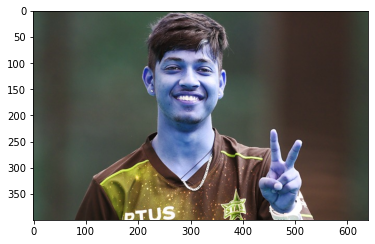

In [4]:
plt.imshow(img)
plt.show()

#### Visualizing the same image as gray image

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### Visualize inline

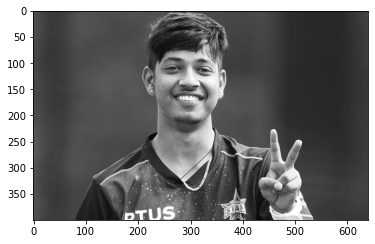

In [6]:
plt.imshow(gray, cmap='gray')
plt.show()

#### Importing the face and eye detector i.e. haarcascade classifier

In [7]:
face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

#### Detecting the face

In [8]:
faces = face_cascade.detectMultiScale(gray, 1.5, 3)
faces

array([[204,  38, 182, 182]], dtype=int32)

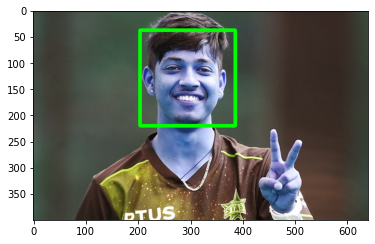

In [9]:
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
    plt.imshow(face_img)

#### Detecting the eyes

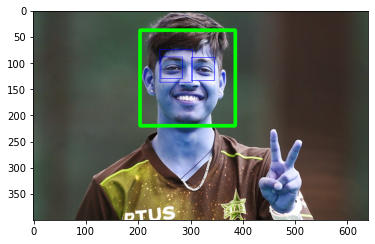

In [10]:
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 1)
    
plt.imshow(face_img)
plt.show()

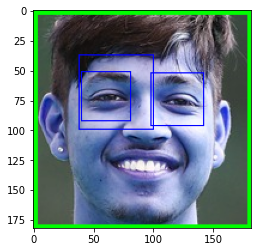

In [11]:
plt.imshow(roi_color, cmap='gray')
plt.show()

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(182, 182, 3)

### Wavelet Transform

In [13]:
#### From stackoverflow

def w2d(img, mode='haar', level=1):
    
    imArray = img
    #Datatype conversions
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    # Convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    
    # Compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    # Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # Reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

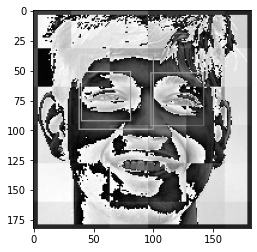

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

### Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

##### Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.5, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

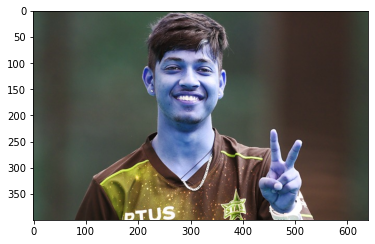

In [16]:
original_image = cv2.imread('image-dataset/sandeep _lamichhane/Nepal spinner Sandeep Lamichhane is....jpg')
plt.imshow(original_image)
plt.show()

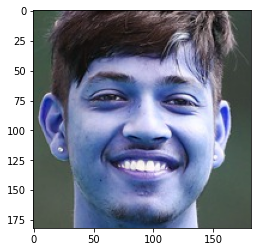

In [17]:
cropped_image = get_cropped_image_if_2_eyes('image-dataset/sandeep _lamichhane/Nepal spinner Sandeep Lamichhane is....jpg')
plt.imshow(cropped_image)
plt.show()

#### In below image face is not very clear and it doesn't have two eyes clearly visible

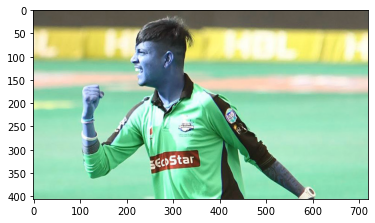

In [18]:
org_image_obstructed = cv2.imread('image-dataset/sandeep _lamichhane/Guerilla Cricket.jpg')
plt.imshow(org_image_obstructed)

In [19]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('image-dataset/sandeep _lamichhane/Guerilla Cricket.jpg')
cropped_image_no_2_eyes

Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

### Now we have to crop all the images we have in our dataset

In [20]:
path_to_data = 'image-dataset/'
path_to_cr_data = 'cropped_image_dataset/'

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['image-dataset/virat_kohli',
 'image-dataset/cristiano_ronaldo',
 'image-dataset/lionel_messi',
 'image-dataset/sandeep _lamichhane']

##### Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  cropped_image_dataset/virat_kohli
Generating cropped images in folder:  cropped_image_dataset/cristiano_ronaldo
Generating cropped images in folder:  cropped_image_dataset/lionel_messi
Generating cropped images in folder:  cropped_image_dataset/sandeep _lamichhane


In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'virat_kohli': 0,
 'cristiano_ronaldo': 1,
 'lionel_messi': 2,
 'sandeep _lamichhane': 3}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [26]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [27]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(113, 4096)

##### Data cleaning and preprocessing is done.

### Now we are ready to train our model.
We will use SVM with rbf kernel tuned with heuristic finetuning.

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7241379310344828

In [30]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.80      0.67      0.73         6
           2       0.56      1.00      0.72         9
           3       1.00      0.57      0.73         7

    accuracy                           0.72        29
   macro avg       0.84      0.70      0.73        29
weighted avg       0.82      0.72      0.73        29



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [32]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [33]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.724265,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.497794,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.700000,{'logisticregression__C': 1}


In [34]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [35]:
best_estimators['svm'].score(X_test,y_test)

0.8275862068965517

In [36]:
best_estimators['random_forest'].score(X_test,y_test)

0.5862068965517241

In [37]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7241379310344828

In [38]:
best_clf = best_estimators['svm']

In [39]:
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 1, 0],
       [0, 6, 0, 0],
       [0, 0, 9, 0],
       [0, 2, 2, 3]])

Text(69.0, 0.5, 'Truth')

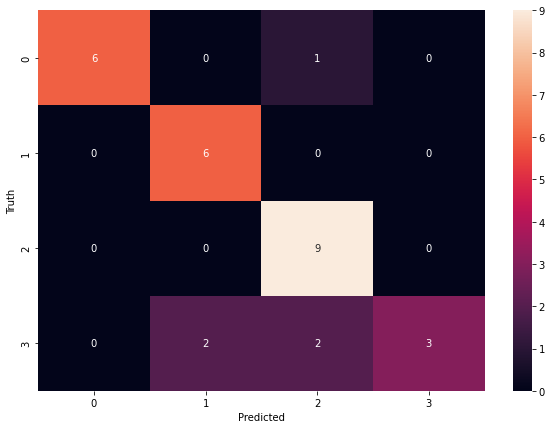

In [42]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Save the trained model

In [44]:
import joblib

## Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

### Save Class Directory

In [45]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))